# Tennis MA-DDPG

This is the report for the Udacity Deep Reinforcement Learning Nanodegree collaboration and competition project. See the `README.md` for a description of the Unity environment.

![Tennis_environment_solved](tennis_solved.png)

## Learning Algorithm

The algorithm used to solve the environment is multi-agent DDPG, as described in the [paper](https://arxiv.org/abs/1706.02275) and the Udacity MA-RL lectures and laboratory, together with the provided [DDPG implementation](https://github.com/udacity/deep-reinforcement-learning/tree/master/ddpg-pendulum) and original [DDPG paper](https://arxiv.org/pdf/1509.02971.pdf).

This implementation is different in various aspects, from code structure to environment-specific settings.

### Actor and Critic Networks

Both actor and critic networks are feed-forward neural networks with four fully-connected layers. The hidden layer dimensions are `256`, `128`, `64`, `32` for both actor and critic. The non-linearity is _leaky ReLU_ for both the critic and the actor, with the actor having the last non-linearity being _TanH_.

The actor input size is the state size (i.e., `8` stated for the Tennis environment), and the output size the action size (i.e., `2`). While the critic ingests all states from all agents along with all actions, with an expanded state of: `(state_size + action_size) * num_agents`.

#### Initialization

The neural network linear layers initialization is [`xavier_uniform`](https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.xavier_uniform_) with `0.4` gain, and weights of the terminal layer are scaled by a factor of `1e-3`.

Weights initialization has a pretty significant impact on speed and convergence of learning.

### Hyperparameters

 * Initial OU noise: `1.0`
 * Noise reduction: `0.9999`
 * Min noise: `0.005`
 * Replay buffer size: `1e5`
 * Sampled batch size: `256`
 * Agent updates every `2` episodes
 * Train agents `4` times on every update
 * Discount $\gamma$: `0.995`
 * Tau $\tau$: `1e-3`
 * Actor / critic LR: `1e-4` / `3e-4`
 * Max episodes: `1500`
 * Max timesteps per episode: `1000`

## Training

Training runs for `1500` episodes. The environment is solved at episode `1105` because the average score for 100 episodes is greater than `0.5`. The average score keeps improving to around `1.55` at episode `1250`, when it starts deteriorating until the last episode with no sign of recovery.

**NOTE**: The pretrained weights included with the project are the ones of the _best_ score achieved during training.

Let's import the necessary module to run the training:

In [1]:
from agent import MultiAgent
from tennis import Tennis
from ma_ddpg import MA_DDPG

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Utility plotting function
def plot(scores):
    """Plot scores and their running average."""
    avgs = pd.Series(scores).rolling(100).mean()
    x = np.arange(len(scores))
    plt.figure('Episode scores')
    plt.plot(x, scores, label='Scores')
    plt.plot(x, avgs, 'r', label='Running average')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [3]:
# Create the Tennis world!
tennis_world = Tennis()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Let's train an agent!

In [4]:
main_agent = tennis_world.new_agent()
main_scores = tennis_world.train(main_agent)

Episode n.50 completed. Average score: 0.000, Noise: 0.93109, Timestep: 714
Episode n.100 completed. Average score: 0.014, Noise: 0.84400, Timestep: 1696
Episode n.150 completed. Average score: 0.022, Noise: 0.76796, Timestep: 2640
Episode n.200 completed. Average score: 0.023, Noise: 0.69176, Timestep: 3685
Episode n.250 completed. Average score: 0.026, Noise: 0.63215, Timestep: 4586
Episode n.300 completed. Average score: 0.025, Noise: 0.57526, Timestep: 5529
Episode n.350 completed. Average score: 0.020, Noise: 0.52670, Timestep: 6411
Episode n.400 completed. Average score: 0.019, Noise: 0.48050, Timestep: 7329
Episode n.450 completed. Average score: 0.025, Noise: 0.43817, Timestep: 8251
Episode n.500 completed. Average score: 0.039, Noise: 0.38730, Timestep: 9485
Episode n.550 completed. Average score: 0.070, Noise: 0.33325, Timestep: 10988
Episode n.600 completed. Average score: 0.087, Noise: 0.28401, Timestep: 12587
Episode n.650 completed. Average score: 0.088, Noise: 0.24271, T

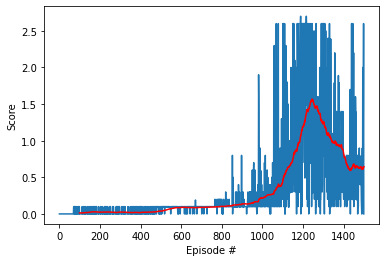

In [6]:
plot(main_scores)

## Future Improvements

Here are some ideas for future improvements on this project:

 * It would be interesting to understand why there is deterioration of performance after episode `1250`: may be the neural network weights are too large or the gradient explodes? What can be done about it?
 * Fine-tuning noise turns out to be critical to have early reward signals to learn at the initial stage of learning, and then keep learning to solve the environment. It'd be interesting to introduce a prioritized experience replay and see if it helps in making sure the agent learns from most meaningful experiences early on.
 * Neural network initialization: training seems to be very sensistive to weights initialization, it'd be interesting to experiment and plot the different ways the same network learns with different initialization strategies.